In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from adjustText import adjust_text
import seaborn as sns
from copy import deepcopy

# Read RLQ analysis outputs

In [4]:
df_l1 = pd.read_csv('l1_loadings_of_phenotype.csv', index_col=0)
df_l1.head()

,RS1,RS2
rhamn.0,2.087996,0.637636
rhamn.1,0.001049,-1.571727
rhamn.2,-0.673088,0.635794


In [5]:
df_c1 = pd.read_csv('c1_loadings_of_pathways.csv', index_col=0)
df_c1.head()

,CS1,CS2
pau02020.0,-0.234154,1.040796
pau02020.1,2.537369,-11.278427
pau00970.0,-0.082986,-0.021517
pau00970.1,2.772438,0.718857
pau00550.0,-0.247166,-0.067231


In [6]:
df_lQ = pd.read_csv('lQ_scores_of_genes.csv', index_col=0)
df_lQ.head()

,AxcQ1,AxcQ2
dnaA,-0.049313,-0.111540
glyQ,-0.048614,-0.002710
dacC,0.077107,0.030151
lipB,0.037495,-0.051576
holA,-0.005745,0.118015


In [7]:
df_lQ.loc[['rhlA','rhlB','rhlC','rhlR']]

,AxcQ1,AxcQ2
rhlA,-0.29453,0.068315
rhlB,-0.29453,0.068315
rhlC,-0.29453,0.068315
rhlR,-0.29453,0.068315


In [8]:
df_lR = pd.read_csv('lR_scores_of_strains.csv', index_col=0)
df_lR

,AxcR1,AxcR2
F22031-1,-0.673088,0.635794
F22031-2,-0.673088,0.635794
F22031-3,-0.673088,0.635794
F30658-1,0.001049,-1.571727
F30658-2,0.001049,-1.571727
F30658-3,0.001049,-1.571727
F34365-1,-0.673088,0.635794
F34365-2,-0.673088,0.635794
F34365-3,-0.673088,0.635794
M1608-1,2.087996,0.637636


# Rank genes

In [54]:
df_rank = None
for phe in ['rhamn.0','rhamn.1','rhamn.2']:
    lines = []
    for gene in df_lQ.index:
        value = np.inner(df_l1.loc[phe], df_lQ.loc[gene])
        lines.append([gene,value])
    df2_rank = pd.DataFrame(lines, columns=['rank_%s'%(phe),'ip_%s'%(phe)]).sort_values('ip_%s'%(phe), ascending=False).set_index('rank_%s'%(phe))
    if df_rank is None:
        df_rank = deepcopy(df2_rank)
    else:
        df_rank = pd.merge(df_rank, df2_rank, left_index=True, right_index=True, how='inner')
df_rank

,ip_rhamn.0,ip_rhamn.1,ip_rhamn.2
pchA,2.792750,0.213456,-1.013762
PA14_64740,1.673647,0.591503,-0.855634
PA14_51050,1.673647,0.591503,-0.855634
fadB,1.465032,-0.558589,-0.172924
cysN,1.449079,-0.728987,-0.076590
...,...,...,...
pqsE,-0.783454,-0.335717,0.432017
pqsB,-0.783454,-0.335717,0.432017
pqsD,-0.783454,-0.335717,0.432017
pqsH,-0.783454,-0.335717,0.432017


In [55]:
df_rank.to_csv('gene_rank_rlq.csv')

# Rank pathways

In [56]:
df_rank = None
for phe in ['rhamn.0','rhamn.1','rhamn.2']:
    lines = []
    for pathway in df_c1.index:
        if pathway.endswith('.1'):
            value = np.inner(df_l1.loc[phe], df_c1.loc[pathway])
            lines.append([pathway.split('.')[0],value])
    df2_rank = pd.DataFrame(lines, columns=['rank_%s'%(phe),'ip_%s'%(phe)]).sort_values('ip_%s'%(phe), ascending=False).set_index('rank_%s'%(phe))
    if df_rank is None:
        df_rank = deepcopy(df2_rank)
    else:
        df_rank = pd.merge(df_rank, df2_rank, left_index=True, right_index=True, how='inner')
df_rank

,ip_rhamn.0,ip_rhamn.1,ip_rhamn.2
pau01053,118.207441,-37.246982,-18.139470
pau00053,77.265214,-22.863285,-12.650313
pau00261,65.767923,-21.931440,-9.445842
pau00471,49.364498,-5.264755,-13.082263
pau00920,43.035480,-31.734475,3.122574
...,...,...,...
pau02025,-25.739348,-8.513541,12.846792
pau00040,-27.342277,-15.026517,16.848757
pau00523,-29.006532,-19.651006,19.859778
pau00405,-36.325454,-22.398826,23.687747


In [57]:
df_rank.to_csv('pathway_rank_rlq.csv')

# Plot in one graph

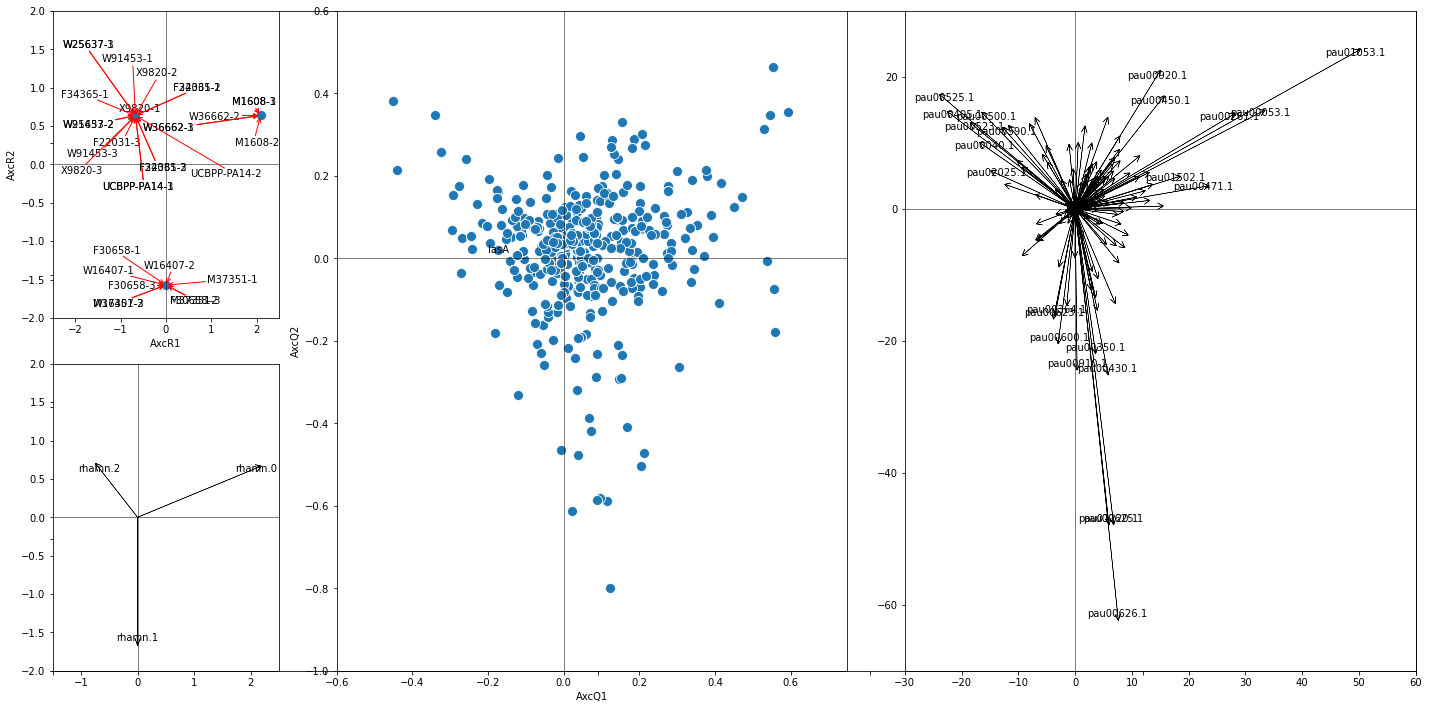

In [50]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_xticklabels('')
ax.set_yticklabels('')

gs = fig.add_gridspec(2,5,figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0:2, 1:3])
ax4 = fig.add_subplot(gs[0:2, 3:6])

# strains
_ = sns.scatterplot(x='AxcR1', y='AxcR2', data=df_lR, ax=ax1, s=100)
_ = ax1.set_xlim([-2.5,2.5])
_ = ax1.set_ylim([-2,2])
_ = ax1.plot([-2.5,2.5],[0,0],'-',color='black',linewidth=0.5)
_ = ax1.plot([0,0],[-2,2],'-',color='black',linewidth=0.5)
texts = [ax1.text(df_lR.loc[strain,'AxcR1'], df_lR.loc[strain,'AxcR2'], strain, ha='center', va='center') for strain in df_lR.index]
_ = adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'), ax=ax1)

# phenotypes
_ = ax2.set_xlim([-1.5,2.5])
_ = ax2.set_ylim([-2,2])
_ = ax2.plot([-1.5,2.5],[0,0],'-',color='black',linewidth=0.5)
_ = ax2.plot([0,0],[-2,2],'-',color='black',linewidth=0.5)
for phenotype in df_l1.index:
    ax2.arrow(0,0,df_l1.loc[phenotype,'RS1'], df_l1.loc[phenotype,'RS2'], linewidth=0.5, head_width=0.1, head_length=0.1, overhang=1.0)
texts = [ax2.text(df_l1.loc[phenotype,'RS1'], df_l1.loc[phenotype,'RS2'], phenotype, ha='center', va='center') for phenotype in df_l1.index]
#_ = adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'), ax=ax2)

# genes
_ = sns.scatterplot(x='AxcQ1', y='AxcQ2', data=df_lQ, ax=ax3, s=100)
df_lQ = df_lQ[df_lQ.AxcQ1<=0.75]
_ = ax3.set_xlim([-0.6,0.75])
_ = ax3.set_ylim([-1.0,0.6])
_ = ax3.plot([-0.6,0.75],[0,0],'-',color='black',linewidth=0.5)
_ = ax3.plot([0,0],[-1.0,0.6],'-',color='black',linewidth=0.5)
texts = []
for gene in df_lQ.index:
    xi = df_lQ.loc[gene,'AxcQ1']
    yi = df_lQ.loc[gene,'AxcQ2']
#     if xi<-0.2 or xi>0.3 or yi < -0.2 or yi>0.3:
#         texts.append(ax3.text(xi, yi, gene, ha='center', va='center'))
    if gene in ['lasR','lasA']:
        texts.append(ax3.text(xi, yi, gene, ha='center', va='center'))
#_ = adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'), ax=ax3)

# pathways
_ = ax4.set_xlim([-30,60])
_ = ax4.set_ylim([-70,30])
_ = ax4.plot([-30,60],[0,0],'-',color='black',linewidth=0.5)
_ = ax4.plot([0,0],[-70,30],'-',color='black',linewidth=0.5)
for pathway in df_c1.index:
    ax4.arrow(0,0,df_c1.loc[pathway,'CS1'], df_c1.loc[pathway,'CS2'], linewidth=0.5, head_width=1, head_length=1, overhang=1.0)
texts = []
for pathway in df_c1.index:
    xi = df_c1.loc[pathway,'CS1']
    yi = df_c1.loc[pathway,'CS2']
    if xi<-12 or xi>15 or yi < -15 or yi>15:
        texts.append(ax4.text(xi, yi, pathway, ha='center', va='center'))
#    if pathway=='pau02024.1':
#        texts.append(ax4.text(xi, yi, pathway, ha='center', va='center'))
#_ = adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'), ax=ax2)

plt.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
fig.savefig('RLQ_analysis_rnaseq_rhamnolipid.svg', format='svg', dpi=1200)